In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)
sns.set_theme(color_codes=True)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report , accuracy_score ,confusion_matrix

In [3]:
file_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\Datasets\\spam.csv'
df = pd.read_csv(file_path,encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
df.sample(10)  # It will print 10 Random rows

,v1,v2
136,ham,He is there. You call and meet him
1682,ham,HI BABE U R MOST LIKELY TO BE IN BED BUT IM SO...
1566,ham,I am late. I will be there at
2826,ham,"Oh right, ok. I'll make sure that i do loads o..."
5090,ham,"St andre, virgil's cream"
5177,ham,Very strange. and are watching the 2nd one n...
2238,ham,Think you sent the text to the home phone. Tha...
5339,ham,You'd like that wouldn't you? Jerk!
4922,ham,Oh yah... We never cancel leh... Haha
4662,ham,No. Yes please. Been swimming?


In [6]:
# Data Analysis
df.info()  # Information about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# Preprocessing
df['v1'] = (df['v1'] == 'spam').astype(int)

In [8]:
x,y = df['v2'].values,df['v1'].values

In [9]:
x = x.tolist()
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x)

In [10]:
# Splitting

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 random_state=1234,
                                                 test_size=0.2)

In [12]:
# KNN

In [13]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

test_pre = knn_model.predict(x_test)

In [14]:
# Output

In [15]:
print(classification_report(y_test,test_pre))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       943
           1       1.00      0.37      0.54       172

    accuracy                           0.90      1115
   macro avg       0.95      0.68      0.74      1115
weighted avg       0.91      0.90      0.88      1115



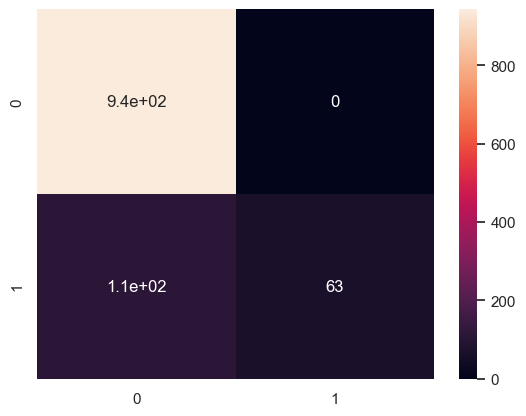

In [16]:
sns.heatmap(confusion_matrix(y_test,test_pre),annot=True)
plt.show()